## Week2 Second Project - JOBIS & Villains
### 제공 데이터: 자비스앤빌런스에서 제공해준 "Jobis_3o3.csv"(고객의 근로/사업/기타소득에 대한 정보)
### 프로젝트 목적: 자비스앤빌런즈에서 제공된 데이터로 아래의 질문의 해답을 찾아보기 
#### 1. 고객의 결제여부에 영향을 미치는 요인들은 무엇인가?
#### 2. 고객의 수수료 결제금액의 합을 높히기 위해서는 어떻게 해야하는가?

## JOBIS & Villains 기업소개 
<center>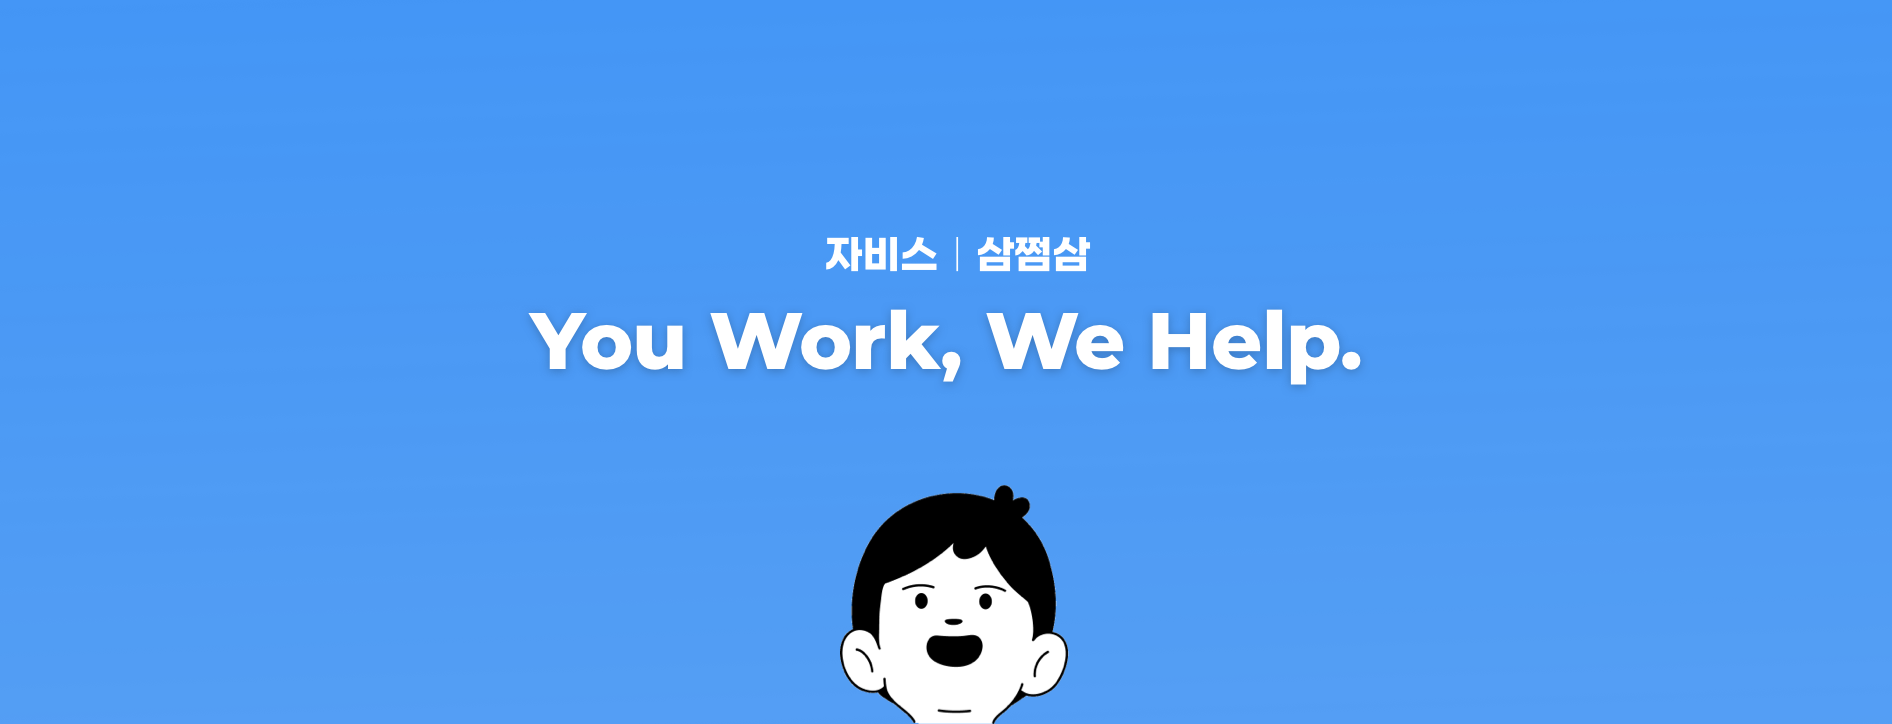</center>

- 참고: [로켓펀치](https://www.rocketpunch.com/companies/jobisnv)
- 설립일: 2015년 08월 12일 (설립 7년차)
- 산업 분야: 웹서비스, 어플리케이션, 클라우드서비스, 세무회계, 경영지원, 기업용클라우드, 노무관리, 경영지원서비스
- 사업 부문
    1. 인공지능 경리, **자비스**: 회계와 급여관리를 자동화하는 **'인공지능 경리'** 서비스
    - 회계를 모르는 사람, 전담 인원을 채용하기 어려운 중소사업자들이 경리 업무인 **잔고 현황**, **각종 비용 내역**, **급여 계산**을 관리할 수 있는 서비스 
    - 자비스 공식 홈페이지: [자비스](https://jobis.co)
    2. **삼쩜삼**: 국민 **세금환급** 솔루션 
    - 2020년 3월 출시 후, 누적 가입자 수 3,000,000 명, 홈택스 계정만 입력하면 5초안에 최대 환급액 확인과 세무사를 통한 신고대행까지 원스톱으로 누릴 수 있는 종합소득세 신고 서비스 
    - 삼쩜삼 공식 홈페이지: [삼쩜삼](https://www.3o3.co.kr)
- 관련 참조 기사들: 
    - [종합소득세 신고, 일반인 10명 중 8명은 모른다](http://m.nistart.co.kr/news/newsview.php?ncode=1065546348421466)
    - [자비스앤빌런즈 '삼쩜삼', 누적 가입자수 100만명 달성](https://www.ebn.co.kr/news/view/1479187)
    - [자비승랜빌런즈 삼쩜삼, 누적 환급액 1000억원 돌파](http://it.chosun.com/site/data/html_dir/2021/06/08/2021060800753.html)

## 1. 데이터 확인하기

### 1-1. 패키지 및 데이터 불러오기 

In [39]:
# 패키지 import 
import pandas as pd
import numpy as np

# 그래프 관련 패키지 import 
import matplotlib.pyplot as plt  # mpatplotlib.pyplot
%matplotlib inline
from matplotlib.gridspec import GridSpec
import matplotlib.dates as mdates #  그래프의 원하는 날짜 형식으로 포멧 셋팅 Matplotlib.dates
import matplotlib.animation as animation # 그래프 애니메이션 효과 셋팅 Matplotlib.animation
import missingno as msno # 결측치 그래프 확인 missingno 패키지

import seaborn as sns
sns.set_style('darkgrid') # seaborn 그래프 background 회색으로 설정 
sns.set_context('talk') # 컨텍스트 매개 변수를 변경 플롯의 레이블에 대한 기본 글꼴 크기를 제어하는데 사용
sns.set(font_scale = 1)

import plotly.express as px # plotly.express
import plotly.io as pio # plotly 라이브러리를 표기하기 위해 추가한 코드 
pio.renderers.default = "notebook_connected"


# 모델링 관련 패키지 import 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

import warnings   # 버전 충돌로 나오는 경고 표시를 표시하지 않게 설정 
warnings.filterwarnings('ignore')

from matplotlib import font_manager, rc   
# plt.rcParams['font.family'] = 'Malgun Gothic'  # (Windows 용) 한글 출력을 위한 글꼴 설정
plt.rcParams['font.family'] = 'AppleGothic'  # (MAC, 리눅스 용)
plt.rcParams['axes.unicode_minus'] = False    # 문자 - (마이너스) 정상 출력을 위한 코드

In [2]:
# 데이터 불러오기 
df = pd.read_csv('data/Jobis_3o3.csv')
df

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타
0,27.0,F,2019,5000.0,400.0,False,10001000.0,61000.0,NaN
1,34.0,M,2018,100000.0,1700.0,True,18092000.0,NaN,1815000.0
2,28.0,F,2017,289000.0,11500.0,False,NaN,1461000.0,NaN
3,27.0,M,2019,410000.0,16200.0,False,NaN,2471000.0,NaN
4,26.0,F,2016,114000.0,4300.0,True,0.0,689000.0,NaN
...,...,...,...,...,...,...,...,...,...
99995,27.0,F,2019,301000.0,11900.0,True,NaN,NaN,680000.0
99996,62.0,F,2019,77000.0,1300.0,True,NaN,463000.0,NaN
99997,24.0,M,2020,9000.0,400.0,False,7923000.0,54000.0,NaN
99998,24.0,M,2019,34000.0,400.0,True,NaN,204000.0,NaN


- 테이블의 내용은 아래의 내용을 담고 있습니다.
    1. 고객이 각 귀속년도별
    2. 근로 / 사업 / 기타 소득에 대한 예상환급액과 수수료를 조회한 뒤
    3. 결제를 하거나 하지 않은 여부를 저장

### 1-2. 데이터 살펴보기 

In [3]:
# 데이터 정보 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   age        100000 non-null  float64
 1   gender     100000 non-null  object 
 2   year       100000 non-null  int64  
 3   refund     100000 non-null  float64
 4   fee        100000 non-null  float64
 5   has_paid   100000 non-null  bool   
 6   income_근로  40791 non-null   float64
 7   income_사업  78227 non-null   float64
 8   income_기타  25260 non-null   float64
dtypes: bool(1), float64(6), int64(1), object(1)
memory usage: 6.2+ MB


- 컬럼 정보
    - age: 고객의 만 나이입니다.
    - gender: 고객의 성별입니다.
    - year: 소득이 발생한 연도(귀속년도)입니다.
    - refund: 예상환급액입니다.
    - fee: 수수료입니다.
    - has_paid: 수수료를 결제했는지의 여부
    - income_근로: 고객의 근로소득(월급/일용직급여)
    - income_사업: 고객의 사업소득(프리랜서 소득)
    - income_기타: 고객의 기타소득(그외 기타 소득)

In [4]:
# 결측치 확인하기
for i in df.columns:
    ab = df[i].isnull().sum()
    if ab < 100000:
        print(i + "has {} null values.".format(ab))
        print()

agehas 0 null values.

genderhas 0 null values.

yearhas 0 null values.

refundhas 0 null values.

feehas 0 null values.

has_paidhas 0 null values.

income_근로has 59209 null values.

income_사업has 21773 null values.

income_기타has 74740 null values.



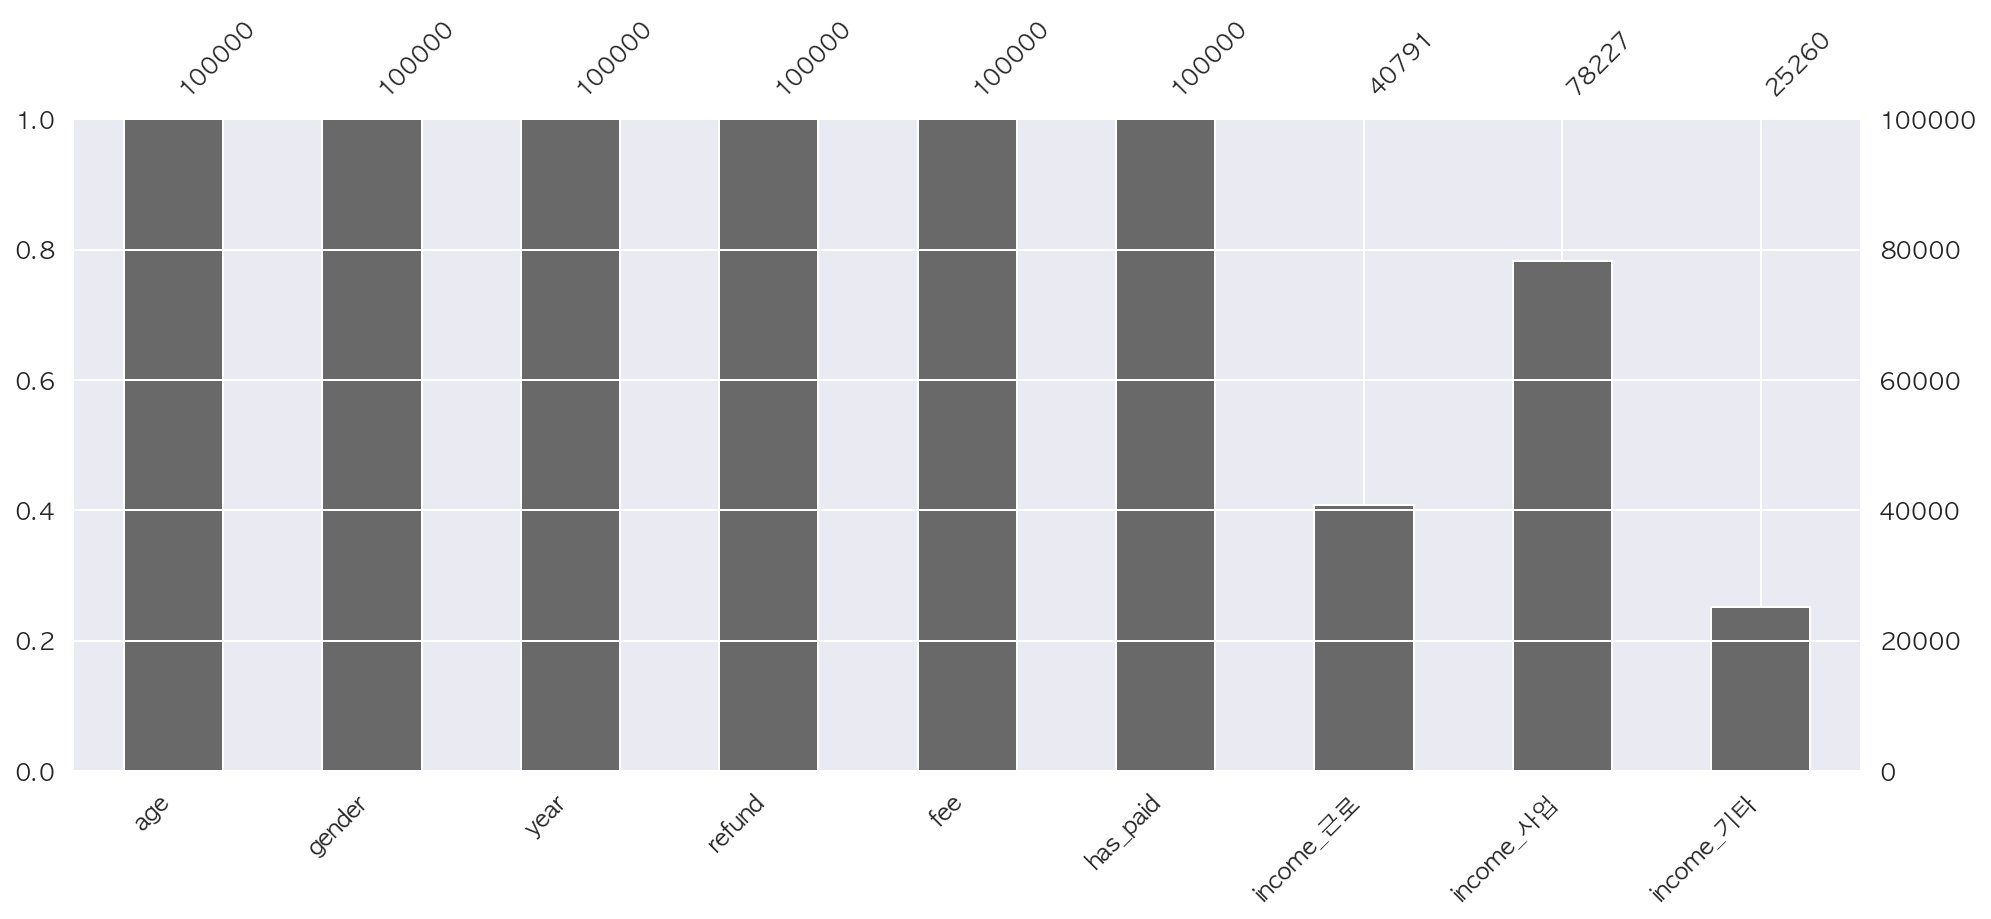

In [5]:
# 결측치 그래프로 나타내기
msno.bar(df, fontsize=12, figsize=(16,6));

- 근로소득, 사업소득, 기타소득에 결측치가 다수 존재 (각각 **59209개**, **21773개**, **74740개**)
- 결측치가 다수 존재하긴 하지만 해당 NaN 값은 결국 소득이 없는 것으로 판단되어 소득의 결측치를 0으로 채워넣어도 될 것이라 판단됨.

In [6]:
# 결측치를 0으로 채우기 
df = df.fillna(0)
df.head()

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타
0,27.0,F,2019,5000.0,400.0,False,10001000.0,61000.0,0.0
1,34.0,M,2018,100000.0,1700.0,True,18092000.0,0.0,1815000.0
2,28.0,F,2017,289000.0,11500.0,False,0.0,1461000.0,0.0
3,27.0,M,2019,410000.0,16200.0,False,0.0,2471000.0,0.0
4,26.0,F,2016,114000.0,4300.0,True,0.0,689000.0,0.0


In [7]:
# 각 column당 row 값 현황 정리 
for col in df.columns:
    print(f"column : {col}")
    print(f"The number of unique : {df[col].nunique()}")  # nunique: 유니크한 value의 갯수를 나타내는 함수
    print()

column : age
The number of unique : 65

column : gender
The number of unique : 3

column : year
The number of unique : 6

column : refund
The number of unique : 1964

column : fee
The number of unique : 352

column : has_paid
The number of unique : 2

column : income_근로
The number of unique : 15082

column : income_사업
The number of unique : 8520

column : income_기타
The number of unique : 2866



## 2. EDA - 데이터 탐색하기

### 2-1. 소득이 발생한 년도 건수 

In [224]:
df['year'].unique()

array([2019, 2018, 2017, 2016, 2015, 2020])

In [236]:
# 소득이 발생한 년도별 건수 분포 
year_2015_count = len(df[df['year']==2015])
year_2016_count = len(df[df['year']==2016])
year_2017_count = len(df[df['year']==2017])
year_2018_count = len(df[df['year']==2018])
year_2019_count = len(df[df['year']==2019])
year_2020_count = len(df[df['year']==2020])
print('2015년 기준 건수:', year_2015_count, '건')
print('2016년 기준 건수:', year_2016_count, '건')
print('2017년 기준 건수:', year_2017_count, '건')
print('2018년 기준 건수:', year_2018_count, '건')
print('2019년 기준 건수:', year_2019_count, '건')
print('2020년 기준 건수:', year_2020_count, '건')

2015년 기준 건수: 3985 건
2016년 기준 건수: 13913 건
2017년 기준 건수: 17495 건
2018년 기준 건수: 19983 건
2019년 기준 건수: 20842 건
2020년 기준 건수: 23782 건


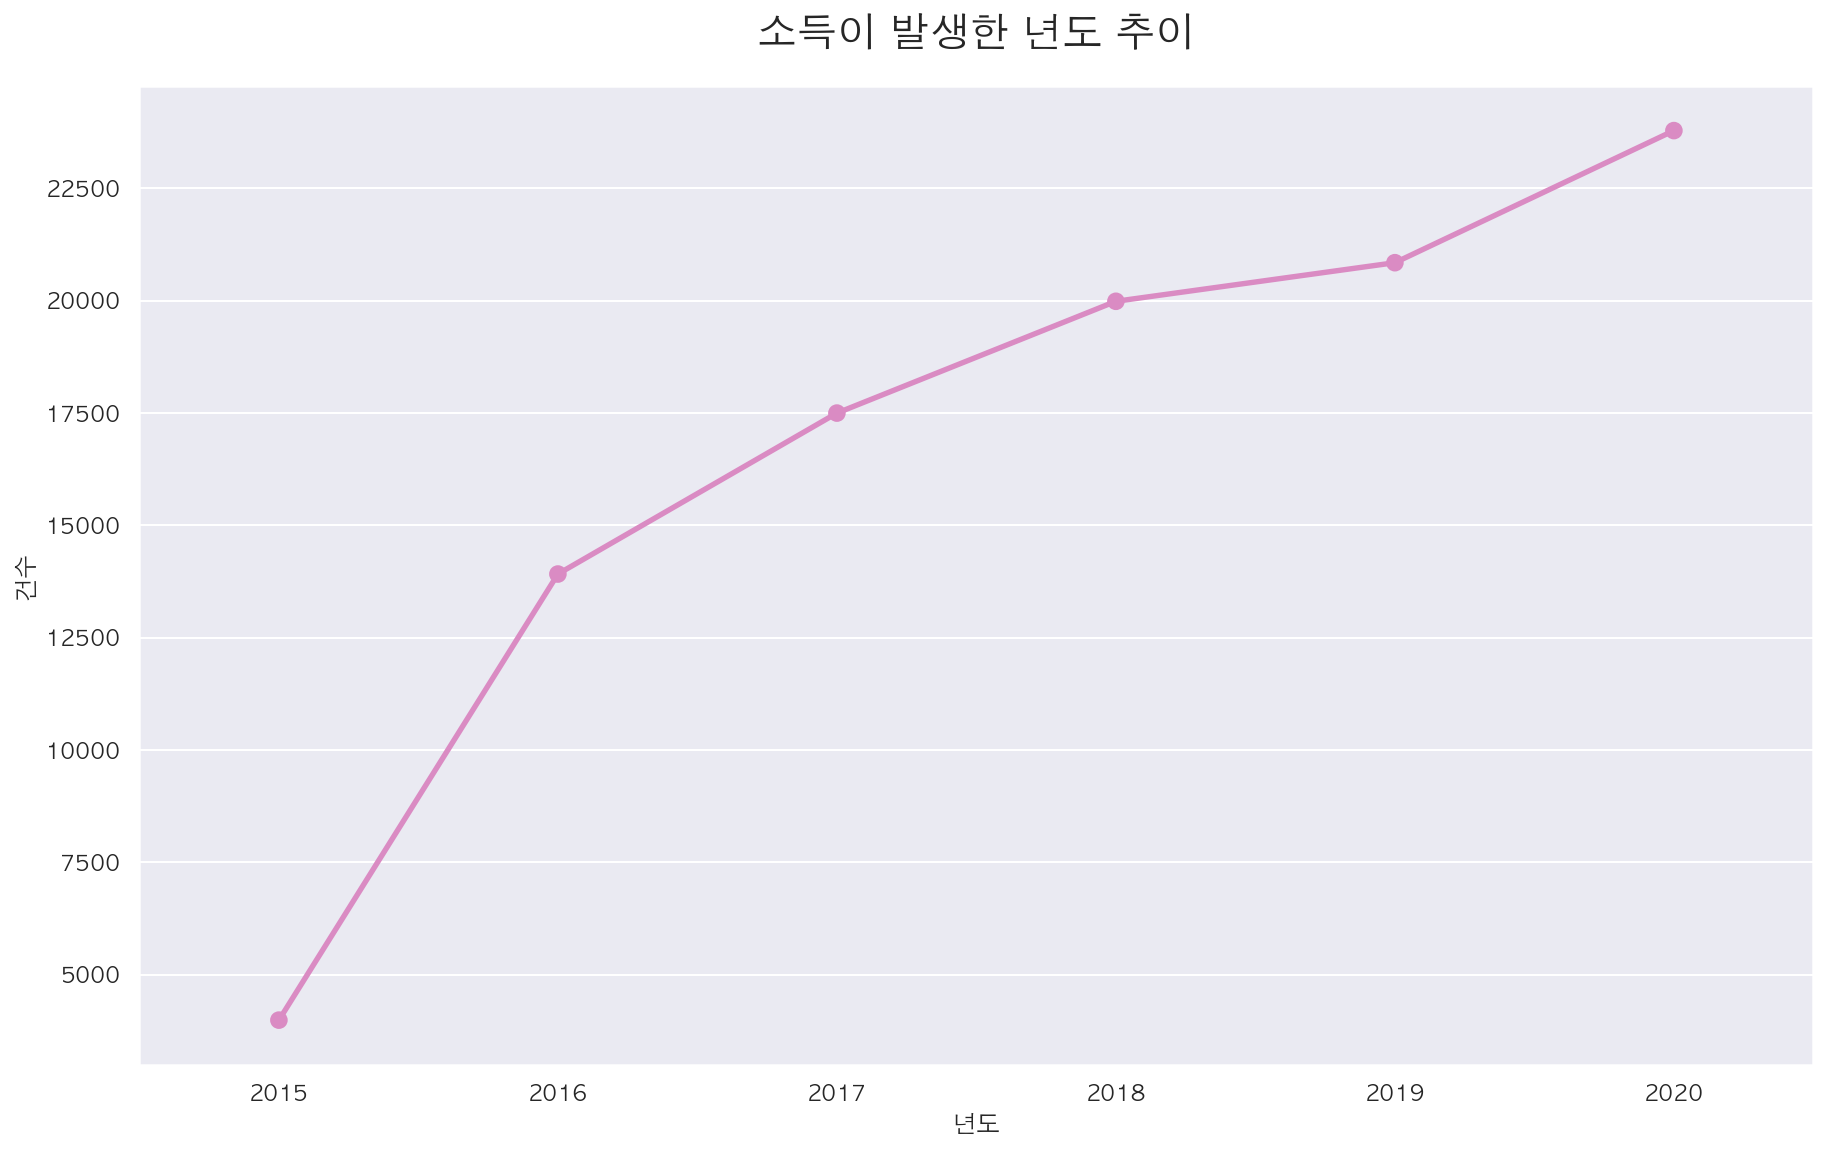

In [251]:
# 그래프로 나타내보기
df_year = pd.DataFrame({'year': [2015, 2016, 2017, 2018, 2019, 2020],
                       'case': [3985, 13913, 17495, 19983, 20842, 23782],
                       })

plt.figure(figsize=[15,9])
sns.pointplot(data=df_year, x='year', y="case", color=sns.color_palette()[6])
plt.title("소득이 발생한 년도 추이", fontsize=20, pad=20);
plt.xlabel('년도')
plt.ylabel('건수')
plt.show()

- 년도별 소득이 발생한건수를 보니 계속해서 증가 추이를 나타내고 있다.
- 그저 언급된 건수이지 여기서 소득에 따라, 수수료 결제 여부 등 변수들에 따라 다르게 해석될 수 있음. 데이터를 더 면밀히 봐야함.

### 2-2. 연령대 분포

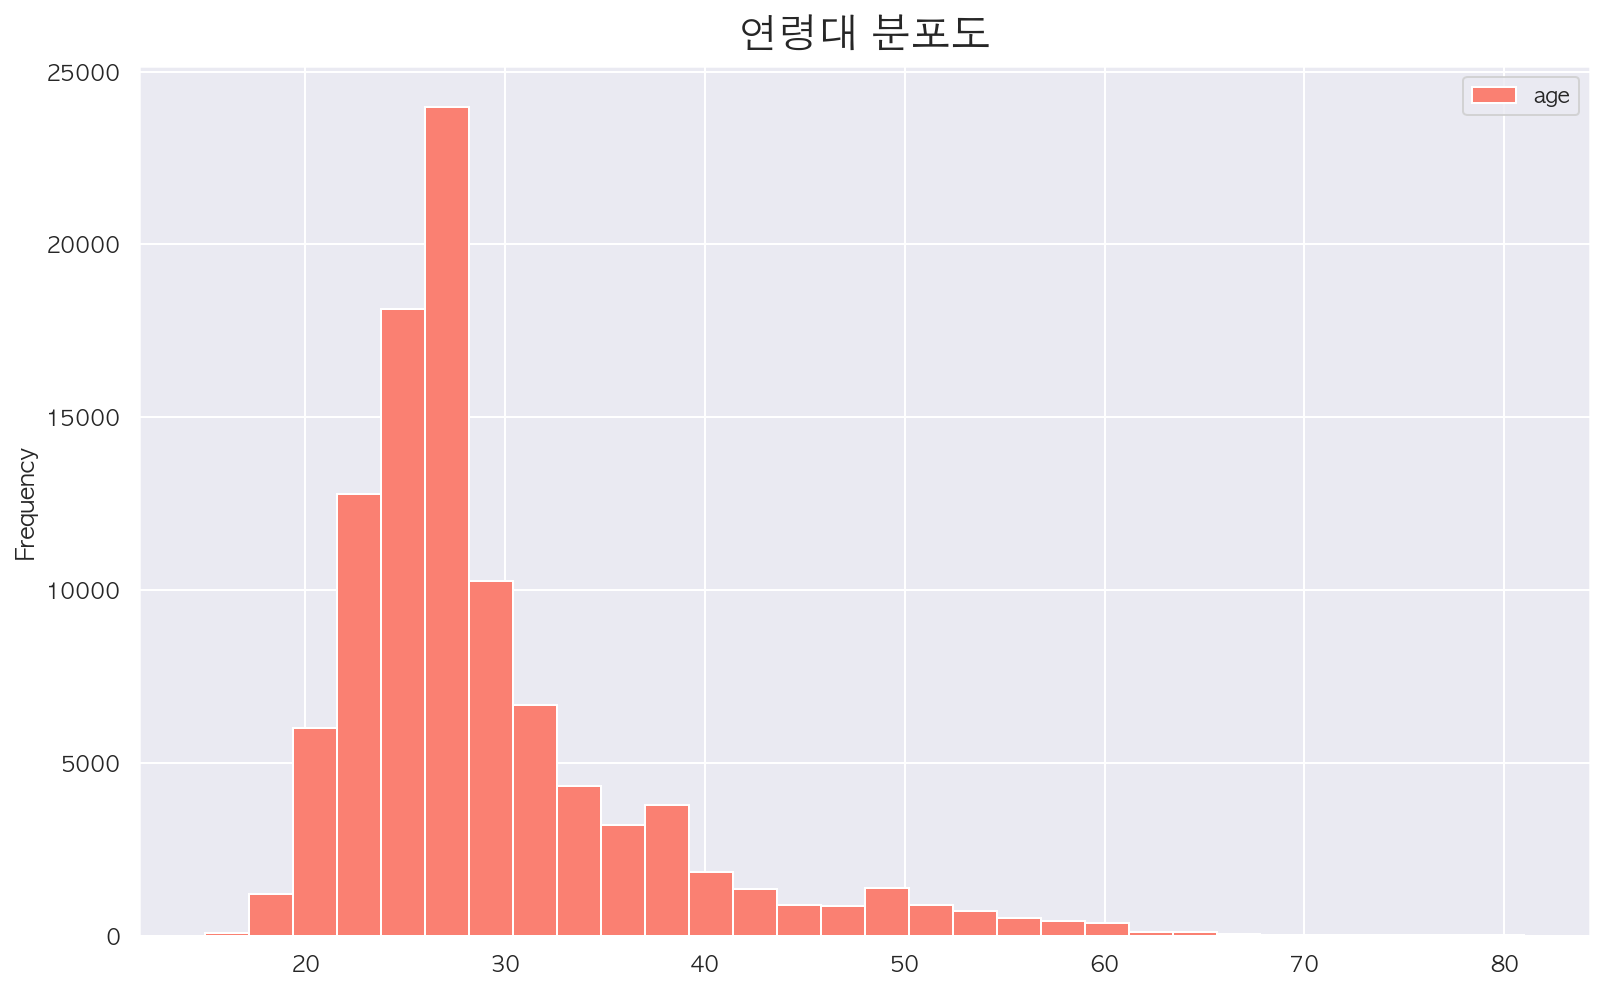

In [214]:
# 연령대 분포도 그래프
df.plot(kind='hist', y='age', bins=30, figsize=(13, 8), color= 'salmon')
plt.title("연령대 분포도", fontsize=20, pad=10)
plt.show()

- 연령대 분포를 보니 20대의 비중이 높다. (소득활동을 활발하게 하는 연령대이기 때문으로 파악됨)
- 가장 낮은 비중은 60대 이다. (소득 활동에서 은퇴를 많이 하는 연령대이기 때문으로 팍악됨)

### 2-3. 남녀 성별 비율 

In [123]:
# 남녀 성별 비율 살펴보기 
male = df[df['gender'] == 'M'] 
female = df[df['gender'] == 'F']
non_gender = df[df['gender'] == '-']

print('남성 그룹: 총', len(male), '건')
print('여성 그룹: 총', len(female), '건')
print('성별 표시 없음 그룹: 총', len(non_gender), '건')
print('남성 비율:', '%.2f'% (len(male)/len(df)*100), '%')
print('여성 비율:', '%.2f'% (len(female)/len(df)*100),'%')
print('성별 표시 없음 비율:', '%.2f'% (len(non_gender)/len(df)*100),'%')

남성 그룹: 총 50477 건
여성 그룹: 총 49501 건
성별 표시 없음 그룹: 총 22 건
남성 비율: 50.48 %
여성 비율: 49.50 %
성별 표시 없음 비율: 0.02 %


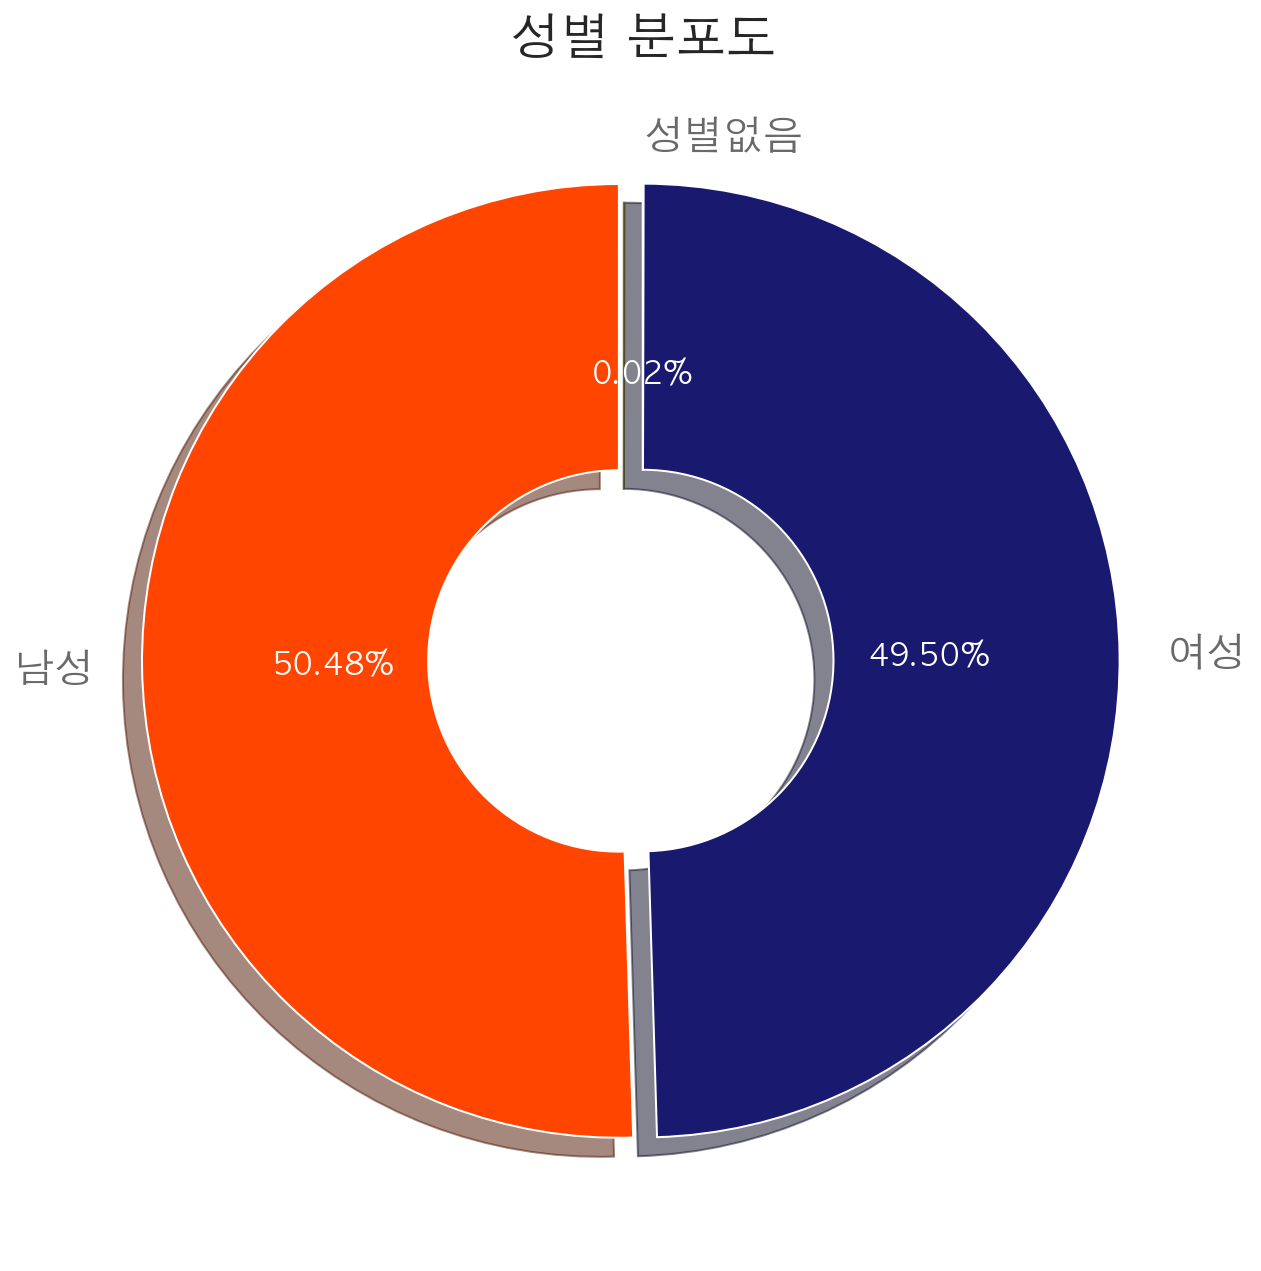

In [212]:
# 성별 분포 차트로 표현
labels = ['남성','여성','성별없음'] ## 라벨
frequency = [50477, 49501, 22] ## 빈도
    
plt.figure(figsize=(13,9)) # 차트 사이즈 
explode = (0.05, 0, 0)  # 튀어나오는 정도 결정 
colors = ['orangered','midnightblue','yellow']  
plt.title("성별 분포도", fontsize=25)  # 차트 타이틀
patches, texts, autotexts = plt.pie(frequency, # 차트에 적용될 값
        explode=explode,  # 특정 값 튀어나오게 강조
        labels=labels,    # 라벨 출력
        colors=colors,    # 색상 설정 
        autopct=lambda p : '{:.2f}%'.format(p) ,  # 퍼센테이지 출력
        shadow=True,     # 차트 그림자 부
        startangle=90,    # 시작점을 90도로 지정
        wedgeprops=dict(width=0.6) # 중간의 반지름 0.5 만큼 구멍을 냄
       )

## label만 변경해주기 
for t in texts:
    t.set_color("dimgrey")
    t.set_fontsize(20)
## pie 위의 텍스트를 다른 색으로 변경해주기 
for t in autotexts:
    t.set_color("white")
    t.set_fontsize(15)
plt.tight_layout()
plt.show()

plt.show()

plt.show()

In [144]:
# 0.02%의 성별없음 확인 
non_gender

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타
2613,27.0,-,2016,559000.0,12800.0,False,0.0,0.0,0.0
4101,27.0,-,2017,209000.0,4300.0,False,0.0,0.0,0.0
9574,42.0,-,2015,175000.0,4300.0,False,0.0,0.0,0.0
20536,26.0,-,2017,845000.0,25100.0,False,0.0,0.0,0.0
28211,26.0,-,2016,650000.0,12800.0,False,0.0,0.0,0.0
36217,27.0,-,2018,124000.0,3400.0,False,0.0,0.0,0.0
37674,27.0,-,2015,252000.0,8500.0,False,0.0,0.0,0.0
38223,53.0,-,2015,6000.0,400.0,False,0.0,0.0,0.0
38441,23.0,-,2018,110000.0,3000.0,False,0.0,0.0,0.0
41454,41.0,-,2015,122000.0,4300.0,True,0.0,0.0,0.0


- 남성은 50.48% (50477 건), 여성은 49.50% (49501 건), 성별 표시 없음은 0.02% (22 건)으로 나타남
- 남성과 여성의 비율이 대체적으로 비슷한 것으로 나타났다.
- 성별마다 소득의 종류와 예상환급액, 수수료 등이 다르다, 자료를 면밀히 볼 필요가 있어보임.
- 성별 표시 없음을 살펴 보니 수입이 없는 그룹임을 알 수 있다. (해당 그룹을 뺄지 말지 결정을 해야 할 듯함.)

### 2-4. 수수료 결제 여부 

In [104]:
# 수수료 결제 여부 - 결제 그룹과 미결제그룹을 뽑아서 결제비율 살펴보기 
paid_group = df[df['has_paid'] == True] 
not_paid_group= df[df['has_paid'] == False] 
print('수수료 결제 그룹: 총', len(paid_group), '건')
print('수수료 미결제 그룹: 총', len(not_paid_group), '건')
print('결제비율:', (len(paid_group)/len(df)*100),'%')

수수료 결제 그룹: 총 64643 건
수수료 미결제 그룹: 총 35357 건
결제비율: 64.643 %


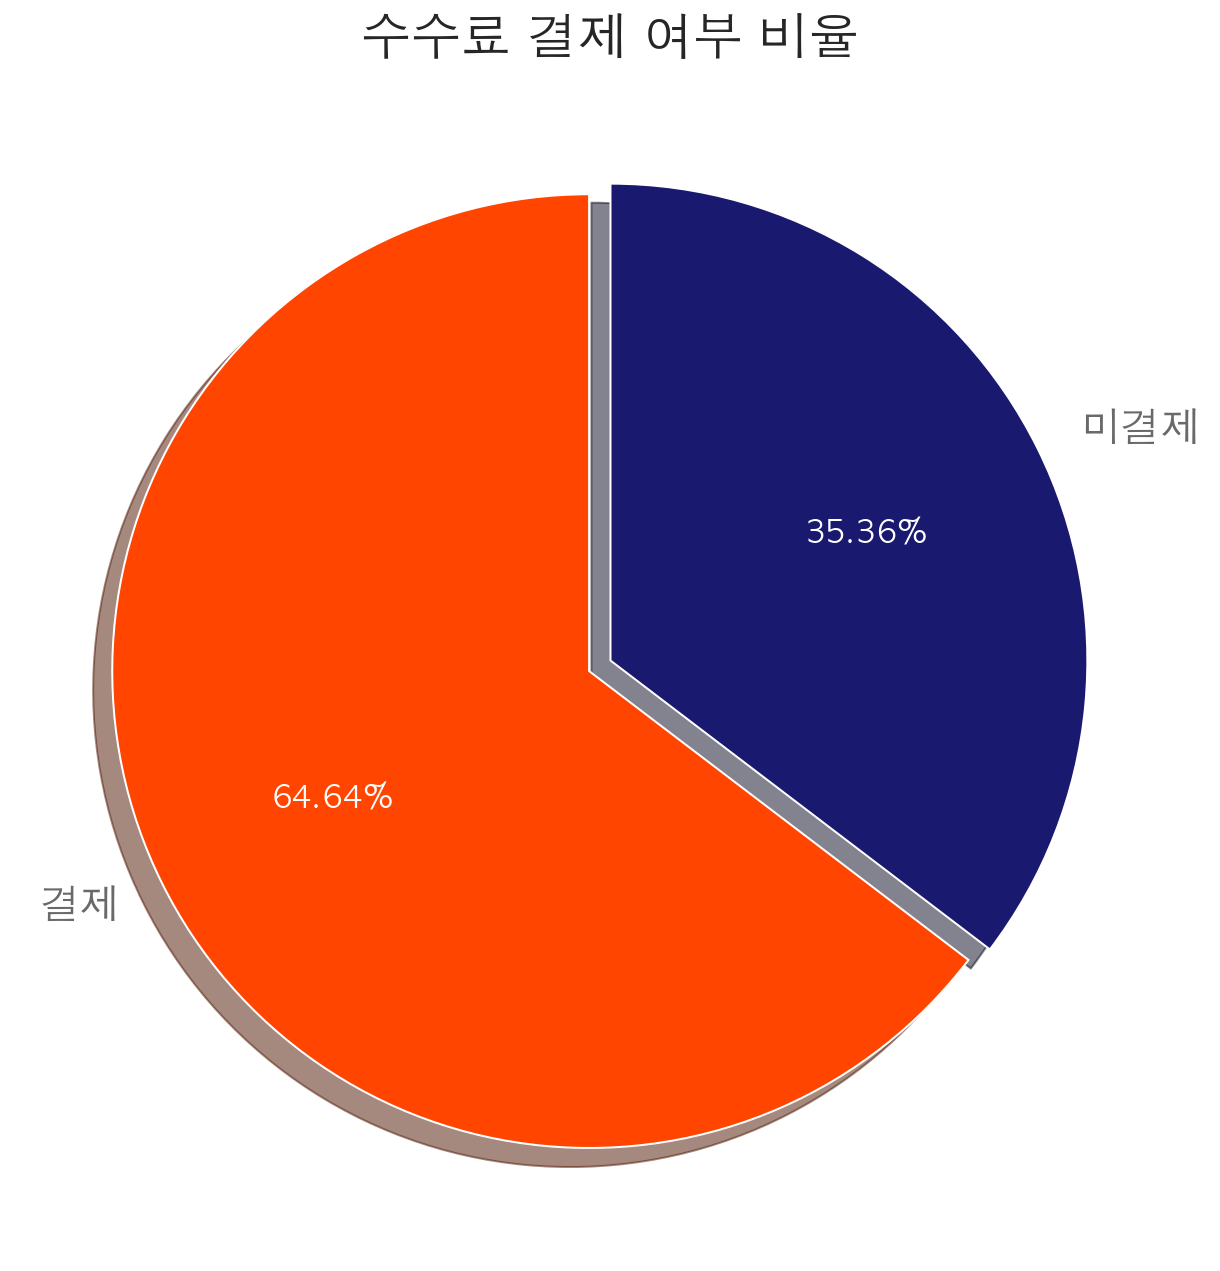

In [213]:
# 수수료 결제 여부
labels = ['결제','미결제'] ## 라벨
frequency = [64643, 35357]   ## 빈도
    
plt.figure(figsize=(13,9)) # 차트 사이즈 
explode = (0.05, 0)  # 튀어나오는 정도 결정 
colors = ['orangered','midnightblue',]  
plt.title("수수료 결제 여부 비율", fontsize=25)  # 차트 타이틀
patches, texts, autotexts =  plt.pie(frequency, # 차트에 적용될 값
        explode=explode,  # 특정 값 튀어나오게 강조
        labels=labels,    # 라벨 출력
        colors=colors,    # 색상 설정 
        autopct=lambda p : '{:.2f}%'.format(p) ,  # 퍼센테이지 출력
        shadow=True,     # 차트 그림자 부
        startangle=90    # 시작점을 90도로 지정
       )

## label만 변경해주기 
for t in texts:
    t.set_color("dimgrey")
    t.set_fontsize(20)
## pie 위의 텍스트를 다른 색으로 변경해주기 
for t in autotexts:
    t.set_color("white")
    t.set_fontsize(15)
plt.tight_layout()
plt.show()

plt.show()

- 수수료 결제 여부를 살펴보니 '결제했다'에 64.64%, '결제하지 않았다'에 35.36%로 나타남.
- 수수료 결제를 한 비율이 높긴 하지만 미결제 비율도 만만치 않게 높다.
- 왜 미결제 했는지 면밀히 살펴 볼 필요가 있어 보임.

### 2-5. 상관관계 분석 

In [13]:
# 데이터 요약 
df.describe()

,age,year,refund,fee,income_근로,income_사업,income_기타
count,100000.00000,100000.000000,1.000000e+05,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05
mean,29.00096,2018.111300,2.081422e+05,7247.641000,2.623921e+06,1.182567e+06,1.607252e+05
std,7.76819,1.495812,3.071744e+05,11926.896979,5.260655e+06,2.254789e+06,7.958761e+05
min,15.00000,2015.000000,-8.265000e+06,400.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,24.00000,2017.000000,3.300000e+04,400.000000,0.000000e+00,3.100000e+04,0.000000e+00
50%,27.00000,2018.000000,9.900000e+04,4300.000000,0.000000e+00,3.280000e+05,0.000000e+00
75%,31.00000,2019.000000,2.540000e+05,8500.000000,2.994000e+06,1.235000e+06,2.000000e+03
max,81.00000,2020.000000,7.725000e+06,307000.000000,1.823350e+08,3.993400e+07,6.281000e+07


In [14]:
# 피어슨 상관관계 계산
df.corr(method='pearson')

,age,year,refund,fee,has_paid,income_근로,income_사업,income_기타
age,1.000000,-0.113500,0.078485,0.072135,-0.022918,0.217894,0.069412,0.054130
year,-0.113500,1.000000,0.140977,0.169537,-0.136060,0.124501,0.153693,0.036665
refund,0.078485,0.140977,1.000000,0.969427,-0.094061,-0.079797,0.610592,0.507695
fee,0.072135,0.169537,0.969427,1.000000,-0.117695,-0.079523,0.601112,0.531414
has_paid,-0.022918,-0.136060,-0.094061,-0.117695,1.000000,0.048247,-0.014917,-0.044802
income_근로,0.217894,0.124501,-0.079797,-0.079523,0.048247,1.000000,-0.086807,0.098044
income_사업,0.069412,0.153693,0.610592,0.601112,-0.014917,-0.086807,1.000000,-0.049067
income_기타,0.054130,0.036665,0.507695,0.531414,-0.044802,0.098044,-0.049067,1.000000


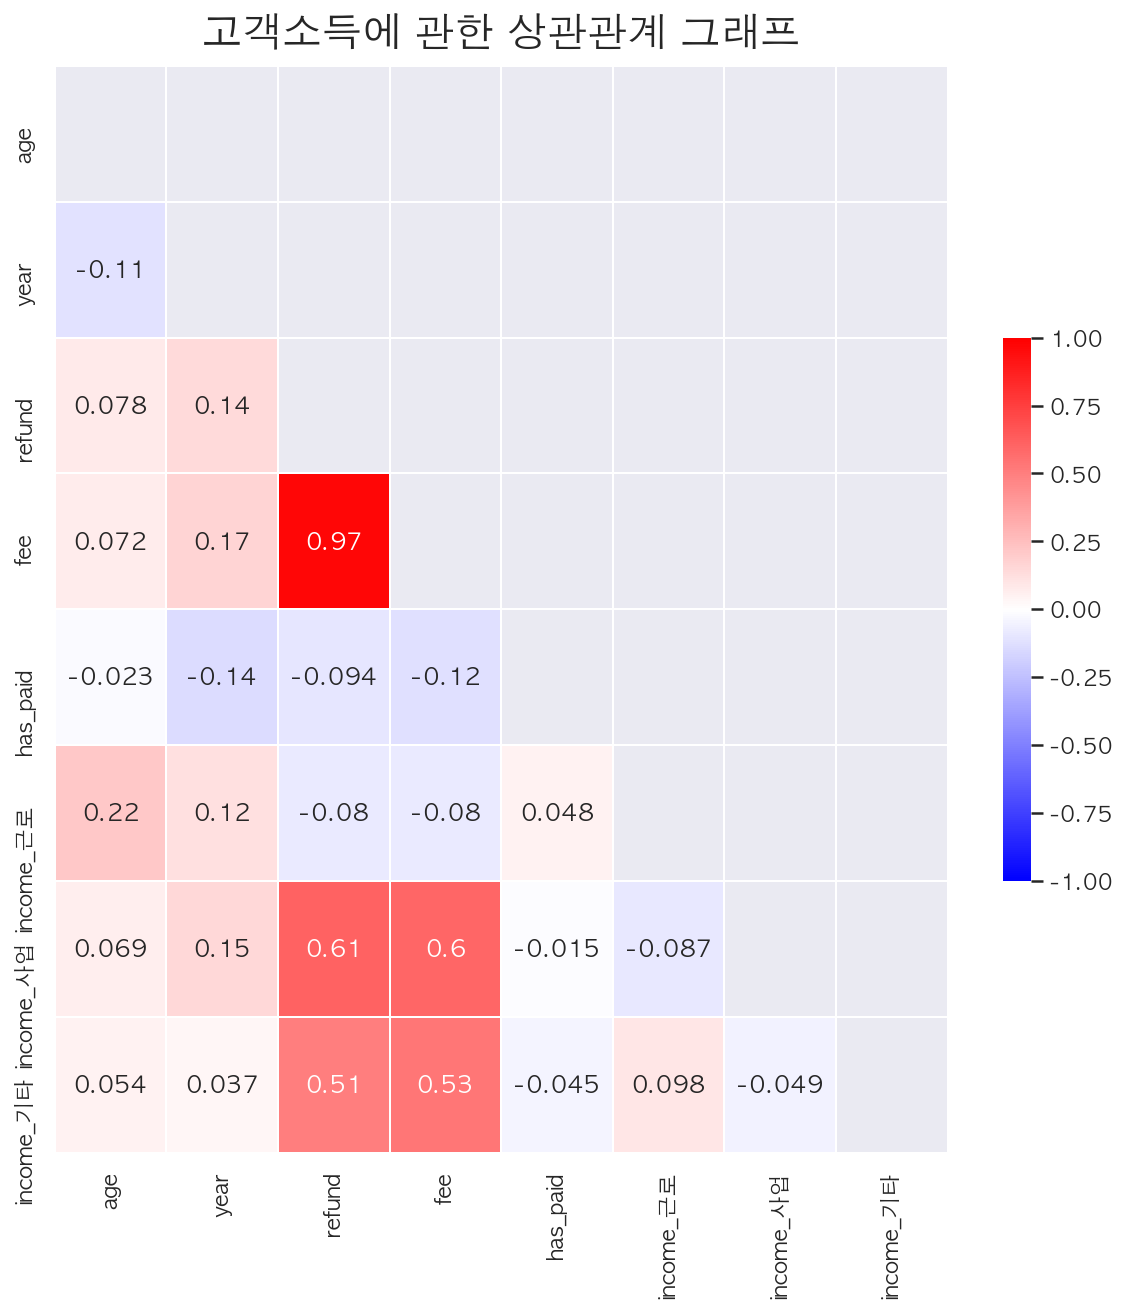

In [53]:
# 상관관계 그래프로 나타내기

a = df.corr()

# 사이즈 지정 
fig, ax = plt.subplots(figsize=(10, 10))

# 삼각형 마스크 만들기 (위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(a, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵 그리기 
sns.heatmap(a, 
            cmap = 'bwr', 
            annot = True,   # 실제 값 표시
            mask=mask,      # 표시하지 않을 마스크 부분 지정 
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5}, # 컬러바 크기 젋반으로 줄이기 
            vmin = -1,vmax = 1    # 컬러바 범위 -1 ~ 1
           )  
plt.title('고객소득에 관한 상관관계 그래프', fontsize=20, pad=10)
#sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
 #          square=True, linewidths=.5, annot=True)
plt.show()

- 환급액에 비례해서 수수료를 지불하기 때문에 **수수료**와 **환급액**의 양의 상관관계가 강하다 
- 환급액, 수수료와 상관관계를 강하게 보이는 유형은 **사업소득**과 **기타소득** 이다.
- **근로소득** 환급액, 수수료와 상관관계가 없다. 아마 **근로소득**은 추후 연말정산을 진행하기 때문에 환급액과 수수료가 없는 것이 아닐까? 라는 추측을 하게 됨.
- 연령과 근로소득에 양의 상관관계가 존재한다. 아마 연차 때문이지 않을까 추측 됨.

### 1차 탐색 결과 
1. **소득은 해마다 증가**한다. 
2. 소득활동을 하는 연령대는 **20대가 가장 높고** **60대 이상이 가장 낮게** 나타났다.
3. 소득활동을 하는 성별의 차이가 그렇게 크지않지만 근소한 차이로 **남성이 많다**.
4. 자비스에서 제공하는 예상환급액 서비스를 제공받고 **수수료를 결제한 비율이 높지만, 생각보다 결제를 하지 않은 비율도 낮다고 볼 수 없다.**
5. 상관관계를 통해서 안 사실은 **수수료와 환급액**의 상관관계가 제일 높았다. (당연히 환급액 서비스를 받고 수수료를 내야하는 특성상 그렇다고 볼 수 있다.)
6. 환급액과 수수료와 상관관계를 강하게 보이는 유형은 **사업소득과 기타소득**이다.(아무래도 근로소득 같은 경우 연말정산을 받기때문에 음의 상관관계를 나타냈다고 보여짐)

### 1차 탐색후 분석의 방향성 
1. 지난 수업 시간 때 언급했던 코호트 즉 동일 집단 분석을 활용하여 유저 분석 시 연령대를 기준으로 하는게 좋지 않을까라는 생각을 함. (팀원분들과 논의)
2. 코호트 간 상이한 행동 패턴을 파악 할 때 소득이 발생한 년도를 기준으로 분석하면 어딸까? (역시 팀워분들과 논의)
3. 환급액과 수수료와의 상관관계가 강하게 보이는 유형이 사업소득과 기타소득, 이 두 유형을 바탕으로 분석을 하면 원하는 결과를 얻을 수 있지 않을까? (역시 팀원분들과 논의)